for add image from network:

![](image location)

In [142]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [143]:
from google.colab import drive
drive.mount('/content/drive')

def imshow(title="", image=None, axis=False):
  plt.imshow(img[:, :, ::-1])
  plt.title(title)
  plt.axis(axis)
  plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
def imshow(image=None, title="", size=10,  axis=False, cmap=None):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w / h
  plt.figure(figsize=(size * aspect_ratio, size))
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB), cmap=cmap)
  plt.title(title)
  plt.axis(axis)
  plt.show()

find contours:

steps: Gray --> threshholding or canny --> findcontours --> draw contours

cv2.findContours mode:
*   cv2.RETR_LIST → Retrieve all contours, doesn't creat any parent and child (they are same)
*   cv2.RETR_EXTERNAL → Retrieves external or outer contours only, all child contour are left behind
*   cv2.RETR_COMP → Retrieves all in a 2-level hierarchy, 2 level hierarchi.
*   cv2.RETR_TREE → Retrieves all in the full hierarchy, create full family hierarchy

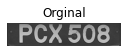

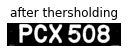

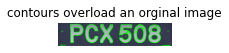

number of contours found: 38



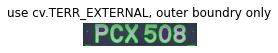

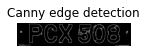

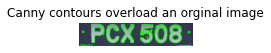

number of contours found: 38


In [145]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/LP.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imshow(img_gray, "Orginal", cmap='gray')

# find contours work best when image threshold and binerized
_, th = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
imshow(th, 'after thersholding')

img1 = img.copy()
contour, hierarchi = cv.findContours(th, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
cv.drawContours(img1, contour, -1, (0, 255, 0), thickness=2)
imshow(img1, 'contours overload an orginal image')
print(f"number of contours found: {len(contour)}\n")

img2 = img.copy()
contour2, hierarchi2 = cv.findContours(th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(img2, contour2, -1, (0, 255, 0), thickness=2)
imshow(img2, 'use cv.TERR_EXTERNAL, outer boundry only')

# We can use canny edge detection instead of tresholding
img3 = img.copy()
edges = cv.Canny(img_gray,30, 200)
imshow(edges, 'Canny edge detection')
contour_canny, hierarchi = cv.findContours(edges, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
cv.drawContours(img3, contour_canny, -1, (0, 255, 0), thickness=2)
imshow(img3, 'Canny contours overload an orginal image')

print(f"number of contours found: {len(contour)}")

Hierarchi:

is an array which stores 4 value for each contours:
1.   index of next contour
2.   index of previous contour
3.   index of the parent contour
4.   index of the child contour


In [146]:
#contour[0] list of pixel 
# hierarchi

ontouring modes:

cv.CHAIN_APPROX_NONE: give us all the point of image

cv.CHAIN_APPROXE_SIMPLE: just stores the end point of the contours, less space

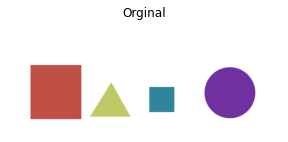

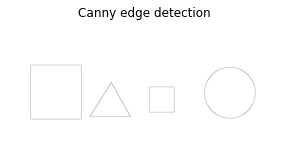

Number of contours found: 4



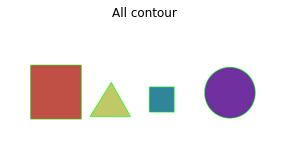

In [147]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/bunchofshapes.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imshow(img, "Orginal", size=12)

edges = cv.Canny(img_gray, 50, 200)
imshow(~edges, "Canny edge detection", size=12) # add ~ to see white background and black edges

contour, hierarchi = cv.findContours(edges.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
print(f"Number of contours found: {len(contour)}\n")

cv.drawContours(img, contour, -1, (0, 255, 0), 2)
imshow(img, "All contour", size=12)

contours Area befor sorting:
[20587.5, 22901.5, 66579.5, 90222.0]

contours Area after sorting:
[90222.0, 66579.5, 22901.5, 20587.5]

Search for moments output: {'m00': 20587.5, 'm10': 18250924.833333332, 'm01': 9099782.333333332, 'm20': 16214606883.25, 'm11': 8067011518.125, 'm02': 4057711167.4166665, 'm30': 14436508422455.451, 'm21': 7166954589089.566, 'm12': 3597188928206.5664, 'm03': 1824964836980.2002, 'mu20': 35067975.07837677, 'mu11': 7590.238600730896, 'mu02': 35559934.190416336, 'mu30': -11432.6015625, 'mu21': 353952.1429042816, 'mu12': 359855.0387878418, 'mu03': -6583.537353515625, 'nu20': 0.08273770399700484, 'nu11': 1.7908046107890125e-05, 'nu02': 0.0838984088081491, 'nu30': -1.8799055832427544e-07, 'nu21': 5.820167929485615e-06, 'nu12': 5.9172314619470645e-06, 'nu03': -1.0825557560719243e-07}


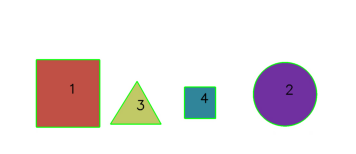

In [148]:
def get_contour_area(contours):
  areas = []
  for c in contours:
    area = cv.contourArea(c)
    areas.append(area)
  return areas

img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/bunchofshapes.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(img_gray, 50, 200)

contour, hierarchi = cv.findContours(edges.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

print(f"contours Area befor sorting:\n{get_contour_area(contour)}\n")

sorted_contours = sorted(contour, key=cv.contourArea, reverse=True)
print(f"contours Area after sorting:\n{get_contour_area(sorted_contours)}\n")

for i, c in enumerate(sorted_contours):
  M = cv.moments(c) # Center point of a contour
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])
  cv.putText(img, str(i + 1), (cx, cy), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 3)
  cv.drawContours(img, c, -1, (0, 255, 0), 3)

print(f"Search for moments output: {M}")
imshow(img, size=15)

In [149]:
def x_cord_countor(contours):
  if cv.contourArea(contours) > 10:
    M = cv.moments(contours)
    return int(M['m10'] / M['m00'])
  else:
    pass

def label_contour_center(image, contours):
  M = cv.moments(c) # Center point of a contour
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])
  cv.circle(image, (cx, cy), 10, (0, 0,255), -1)
  
  return image


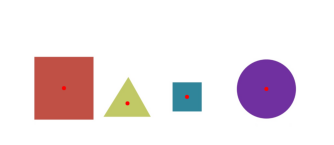

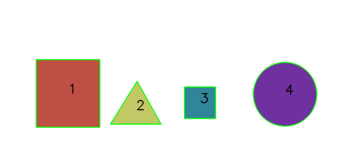

In [150]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/bunchofshapes.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(img_gray, 50, 200)
img2 = img.copy()

contour, hierarchi = cv.findContours(edges.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
for i, c in enumerate(contour):
  orig = label_contour_center(img, c)

imshow(img, size=14)

contours_left_to_right = sorted(contour, key=x_cord_countor, reverse=False)

for i, c in enumerate(contours_left_to_right):
  cv.drawContours(img2, c, -1, (0, 255, 0), 3)
  M = cv.moments(c) # Center point of a contour
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])
  cv.putText(img2, str(i + 1), (cx, cy), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 3)
  x, y, w, h = cv.boundingRect(c)

imshow(img2, size=15)

**Approximating contours using ApproxPolyDP**


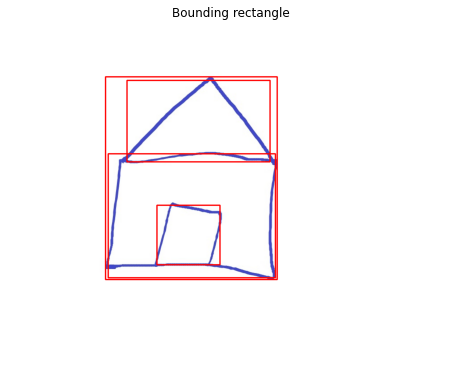

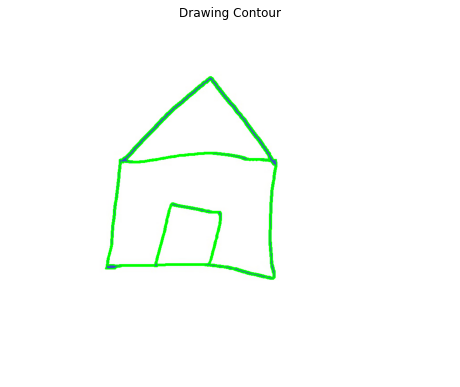

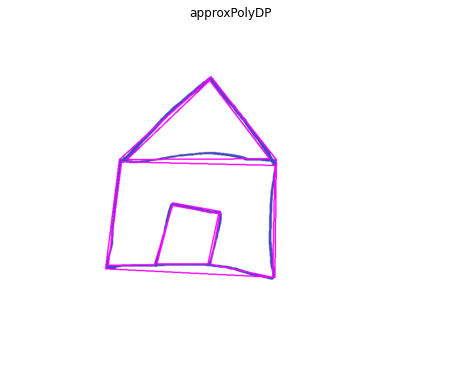

In [151]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/house.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()

ret, th = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY_INV)

contour, hierarchi = cv.findContours(th.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
copy = img.copy()

for c in contour:
  x, y, w, h = cv.boundingRect(c)
  cv.rectangle(img2, (x, y), (x+w, y+h), (0, 0, 255), 2)
  cv.drawContours(img, [c], 0, (0, 255, 0), 2)

imshow(img2, "Bounding rectangle")
imshow(img, "Drawing Contour")

for c in contour:
  # calculate the accuracy as a percent of the contour perimeter
  accuracy = 0.03 * cv.arcLength(c, True)
  approx = cv.approxPolyDP(c, accuracy, True)
  cv.drawContours(copy, [approx], 0, (255, 0, 255), 2)

imshow(copy, "approxPolyDP")

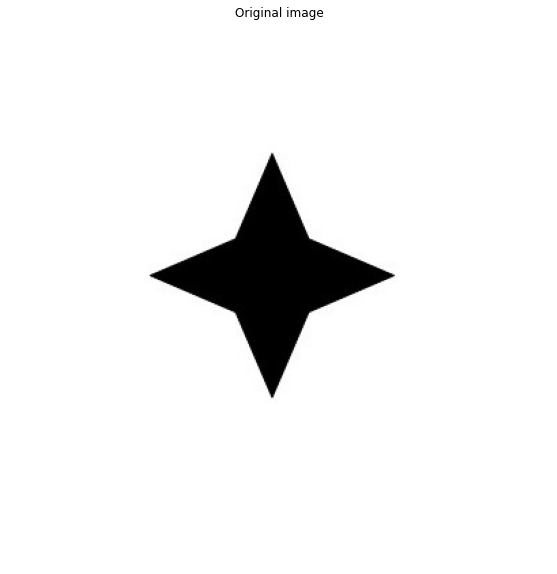

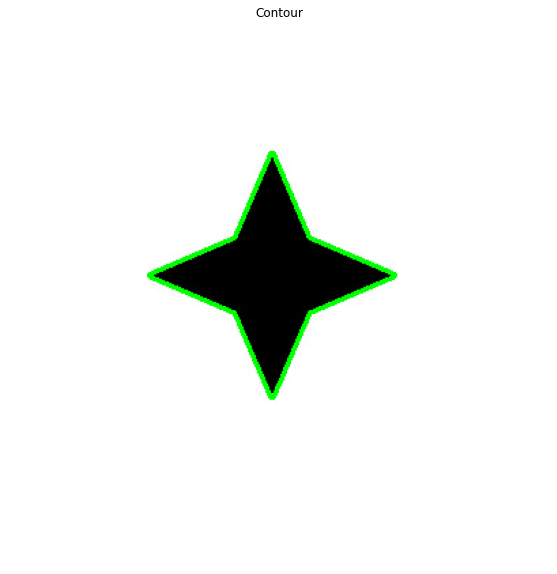

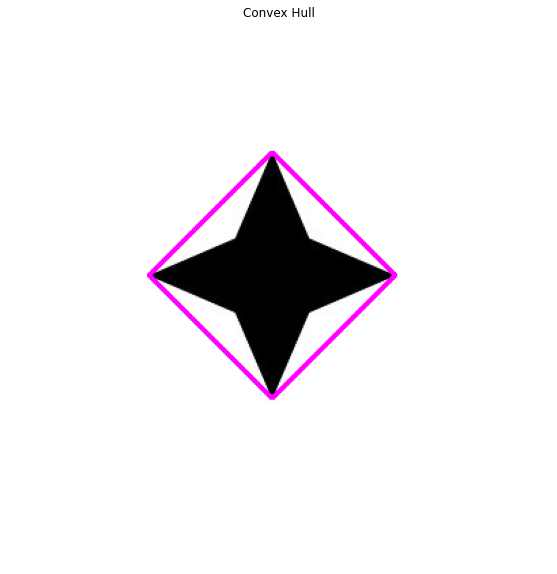

In [156]:
# img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/hand.jpg')
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/4star.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()
imshow(img, "Original image")
ret, th = cv.threshold(img_gray, 127, 255, 0)

contour, hierarchi = cv.findContours(th.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
# cv.drawContours(img, contour, -1, (0, 255, 0), 2)
# imshow(img, "Contour")

# remove the largest frame contour
n = len(contour) - 1
contours = sorted(contour, key=cv.contourArea, reverse=False)[:n]

cv.drawContours(img, contours, -1, (0, 255, 0), 2)
imshow(img, "Contour")

for c in contours:
  hull = cv.convexHull(c)
  cv.drawContours(img2, [hull], 0, (255, 0, 255), 2)

imshow(img2, "Convex Hull")

**cv2.matchShapes(contour_template, contour, method, method_parameter)**

contour_template: reference contour

contour: the individual contour we are cheking against

method: type of contour matching --> (1, 2, 3)

method_parameter: leave 0.0 (not fully autolized in python

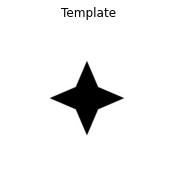

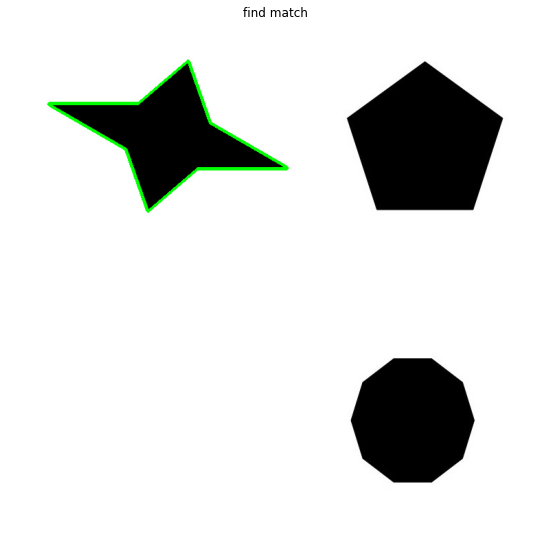

In [157]:
template = cv.imread('/content/drive/MyDrive/images_modernComputerVision/4star.jpg', 0)
target = cv.imread('/content/drive/MyDrive/images_modernComputerVision/shapestomatch.jpg')
target_gray = cv.cvtColor(target, cv.COLOR_BGR2GRAY)
imshow(template, "Template", size=3)
# imshow(target, "Target")


_, th1 = cv.threshold(template, 127, 255, 0)
_, th2 = cv.threshold(target_gray, 127, 255, 0)
contour, hierarchi = cv.findContours(th1, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

# select second largest contour, first is a image outline
sorted_contours = sorted(contour, key=cv.contourArea, reverse=True)
template_contour = sorted_contours[1]

cv.drawContours(template, template_contour, -1, (0, 255, 255), 5)
# imshow(template, "template Contour, gray image")

contour, hierarchi = cv.findContours(th2, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

closest_contour = None
for c in contour:
  matches = cv.matchShapes(template_contour, c, 3, 0.0)
  # print(matches)
  if matches < 0.15:
    closest_contour = c

cv.drawContours(target, [closest_contour], -1, (0, 255, 0), 3)
imshow(target, "find match")

Line, Circle and Blobe detection

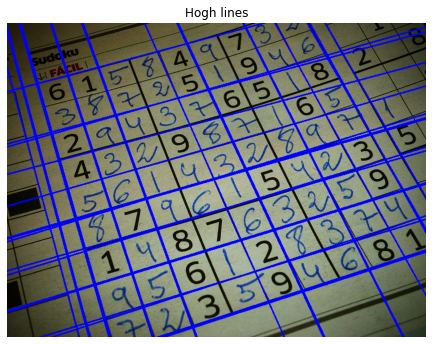

In [165]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/soduku.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# imshow(img, "Original")

edges = cv.Canny(img_gray, 100, 170)
# imshow(edges)
                    # src, rho, theta, threshold
lines = cv.HoughLines(edges, 1, np.pi/180, 240)

for line in lines:
  rho, theta = line[0]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a * rho
  y0 = b * rho
  x1 = int(x0 + 1000 * (-b))
  y1 = int(y0 + 1000 * (a))
  x2 = int(x0 - 1000 * (-b))
  y2 = int(y0 - 1000 * (a))

  cv.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

imshow(img, "Hogh lines")

Probabilistic Hough lines

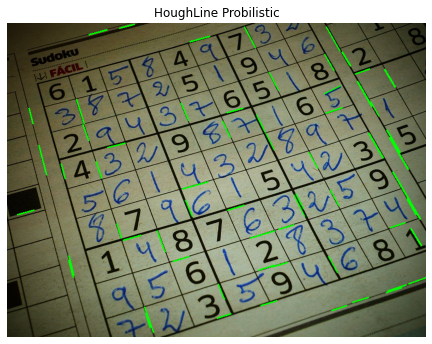

In [167]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/soduku.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# imshow(img, "Original")

edges = cv.Canny(img_gray, 100, 170)
# imshow(edges)
                    # src, rho, theta, threshold, minlineLength, maxLinegap
lines = cv.HoughLinesP(edges, 1, np.pi/180, 100, 3, 25)

for x in range(len(lines)):
  for x1, y1, x2, y2 in lines[x]:
    cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

imshow(img, "HoughLine Probilistic")

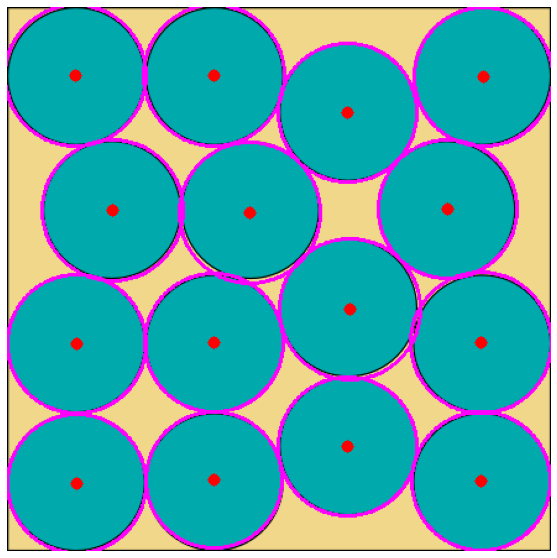

In [187]:
img = cv.imread('/content/drive/MyDrive/Circles_packed_in_square.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.medianBlur(img_gray, 5)
                        # src, method, dpi, minDist, param1, param2, minRadius, maxRadius
circles = cv.HoughCircles(blur, cv.HOUGH_GRADIENT, 1.5, 25).round().astype(np.uint16)
# cv.HoughCircles(img_gray, cv.HOUGH_GRADIENT, 1.2, 100)

for i in circles[0, :]:
  x, y, r = i[0], i[1], i[2]
  # draw the outer circle
  cv.circle(img, (x, y), r, (255, 0, 255), 2)
  #draw the center of the circle
  cv.circle(img, (x, y), 2, (0, 0, 255), 5)

imshow(img)

**Blob detection**

cv2.drawKeypoints(src, keypoint, blank_output, color, flag)


*   cv.DRAW_MATCHES_FLAGS_DEFAULT
*   cv.DRAW_MATCHES_FLAGS_DRAW_REACH_KEYPOINTS
*   cv.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
*   cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS


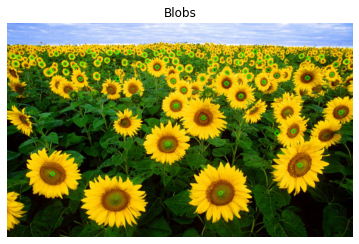

In [199]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/Sunflowers.jpg')
# img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# imshow(img)
# Set up the detector
detector = cv.SimpleBlobDetector_create()

# Detect Blobes
keypoint = detector.detect(img)
blank = np.zeros((1, 1))

blobs = cv.drawKeypoints(img, keypoint, blank, (0, 255, 0), cv.DRAW_MATCHES_FLAGS_DEFAULT)

imshow(blobs, "Blobs")

**Counting circle, Ellipses and Finding Waldo**

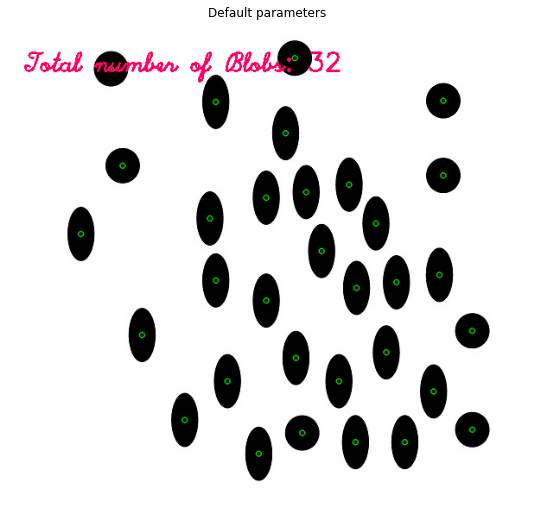

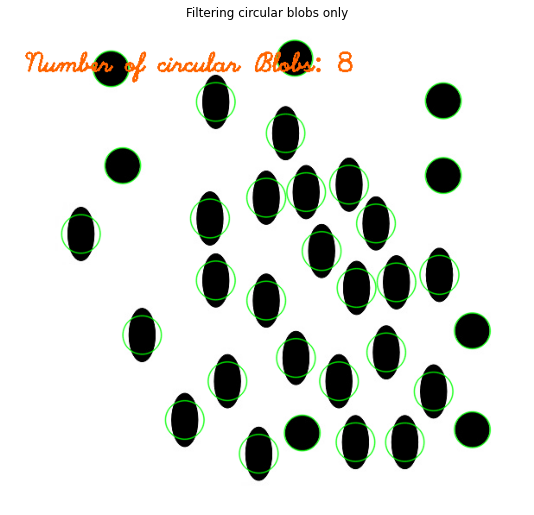

In [210]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/blobs.jpg', 0)
# imshow(img)

detector = cv.SimpleBlobDetector_create()
keypoints = detector.detect(img)
blank = np.zeros((1, 1))
blobs = cv.drawKeypoints(img, keypoint, blank, (0, 255, 0), cv.DRAW_MATCHES_FLAGS_DEFAULT)

text = f"Total number of Blobs: {len(keypoints)}"
cv.putText(blobs, text, (20, 55), cv.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (100, 0, 255), 2)

imshow(blobs,"Default parameters")

params = cv.SimpleBlobDetector_Params()

# Change thresholds
# params.minThreshold = 10;
# params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 100
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.9
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.2
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(img)
blank = np.zeros((1, 1))
blobs = cv.drawKeypoints(img, keypoint, blank, (0, 255, 0), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

text = f"Number of circular Blobs: {len(keypoints)}"
cv.putText(blobs, text, (20, 55), cv.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (0, 100, 255), 2)

imshow(blobs,"Filtering circular blobs only")

![](https://learnopencv.com/wp-content/uploads/2015/02/BlobTest.jpg)

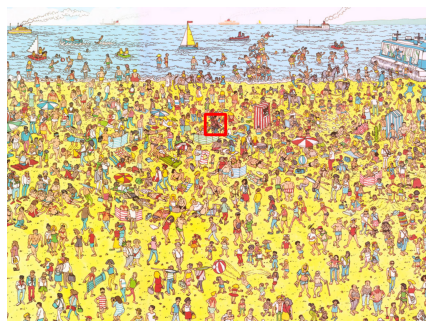

In [221]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/WaldoBeach.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# imshow(img, "Where is Waldo?")
template = cv.imread('/content/drive/MyDrive/images_modernComputerVision/waldo.jpg', 0)

result = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

top_left = max_loc
bottom_right = (top_left[0] +50, top_left[1] + 50)
cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 5)
imshow(img)

**Finding corners**

cv2.cornerHarris()


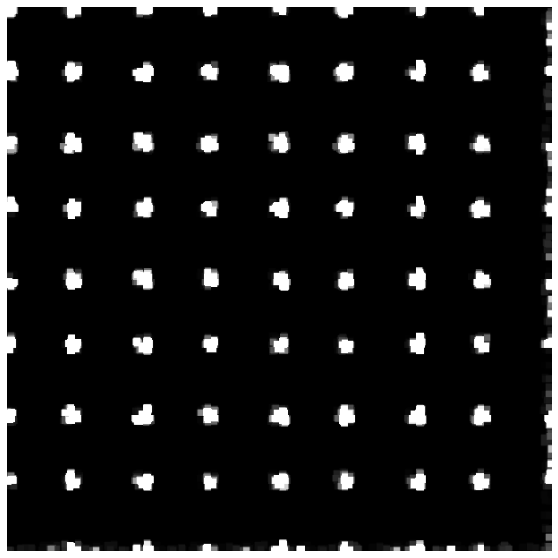

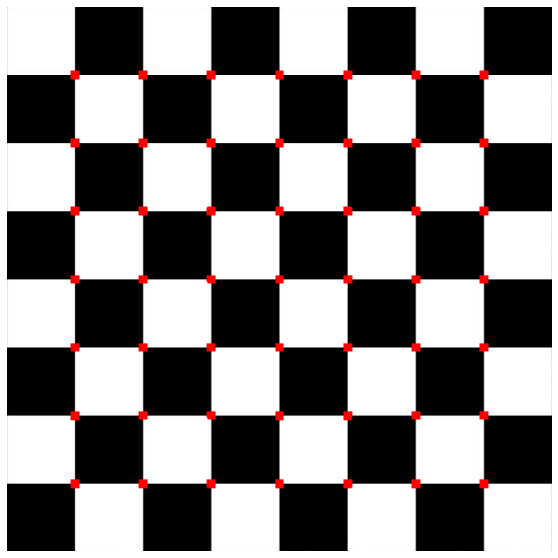

In [241]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/chess.JPG')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.float32)
# imshow(img)
harris_corner = cv.cornerHarris(img_gray, 3, 3, 0.05)
# imshow(harris_corner)

# for enlarge the corner we use dilation
kernel = np.ones((7,7), np.uint8)
harris_corner = cv.dilate(harris_corner, kernel)
# imshow(harris_corner)

# threshold for and optimal value, it may vary depending on the images
# img[harris_corner > 0.025 * harris_corner.max()] = [255, 127, 127]
th = harris_corner.mean() + 3 * harris_corner.std()
img[harris_corner > th] = [0, 0, 255]

imshow(img)

cv2.goofFeatureToTrack()


*   src: 8-bit ot floating 32-bit, single-channel image
*   maxCorners: maximum of corners to return if there are more it will return strongest one
*   qualityLevel: the parameter value will muliplied by the best corner quality(smallest eigen value). corners with quality measure less than product are rejected
*   miniDistance: minimun possible Euclidean distance between the corners



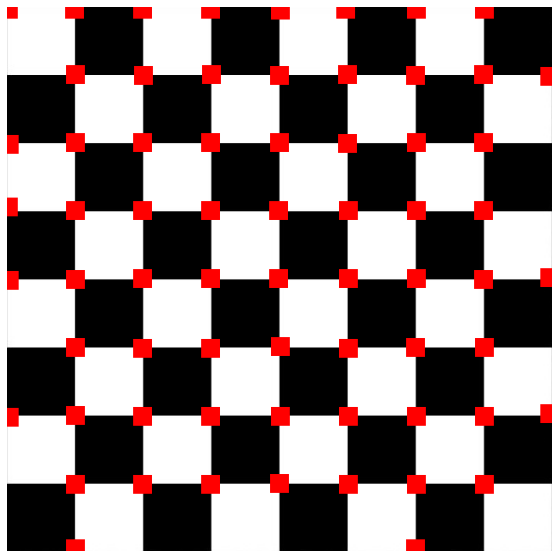

In [256]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/chess.JPG')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.float32)
# imshow(img)
corners = cv.goodFeaturesToTrack(img_gray, 150, 0.0005, 10)
# imshow(harris_corner)
# th = harris_corner.mean() + 1 * harris_corner.std()
# img[harris_corner > th] = [0, 0, 255]
for c in corners:
  x, y = np.int32(c[0])
  cv.rectangle(img, (x-10, y-10), (x+10, y+10), (0, 0, 255), -1)

imshow(img)